IMPORTANDO BIBLIOTECAS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Realizando leitura dos dados

In [4]:
df_idade = pd.read_csv ('data/dados_idade_aposentadoria.csv')
df_altura = pd.read_csv ('data/dados_alturas.csv')
df_vida_lampada = pd.read_csv ('data/dados_vida_lampada.csv')

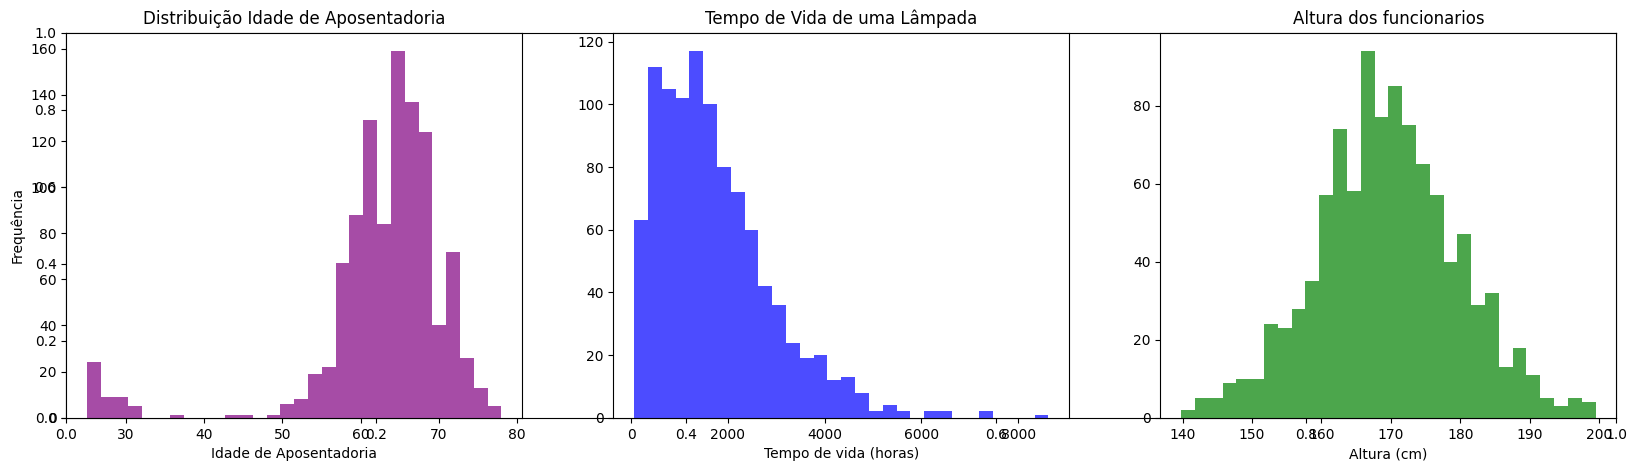

In [5]:
plt.subplots (figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição Idade de Aposentadoria')
plt.xlabel ('Idade de Aposentadoria')
plt.ylabel ('Frequência')
plt.hist (df_idade, bins=30, alpha=0.7, color='purple')

plt.subplot(132)
plt.hist(df_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')

plt.subplot (133)
plt.hist (df_altura, bins=30, alpha=0.7, color='green')
plt.title ('Altura dos funcionarios')
plt.xlabel ('Altura (cm)')

plt.show ()

In [6]:
#tamanho da amostra
n=100

#quantidade de amostras
qnt=100000

#função de reamostragem

def reamostraem_medias (dados, coluna, n, qnt):
    medias = [dados[coluna].sample(n, replace=True).mean()
              for _ in range (qnt)]
    
    return medias


In [7]:
df_altura.head()

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [8]:
media_aposentadoria = reamostraem_medias(df_idade, 'idade', n, qnt)
media_altura = reamostraem_medias(df_altura, 'alturas', n, qnt)
media_vida_lampada = reamostraem_medias(df_vida_lampada, 'duracao', n, qnt)

In [9]:
print ('''  Médias populacionais    ''')

print ('idade', df_idade['idade'].mean())
print ('duracao', df_vida_lampada['duracao'].mean())
print ('altura', df_altura['alturas'].mean())

  Médias populacionais    
idade 62.70857142857143
duracao 1731.8036029420002
altura 169.52022


In [10]:
def avg (list):
    return sum(list) / len(list)

print ('''  Médias amostrais    ''')

print ('idade', avg (media_aposentadoria))
print ('duracao', avg (media_vida_lampada))
print ('altura', avg (media_altura))

  Médias amostrais    
idade 62.711296200000184
duracao 1731.8053080293682
altura 169.51949409200012


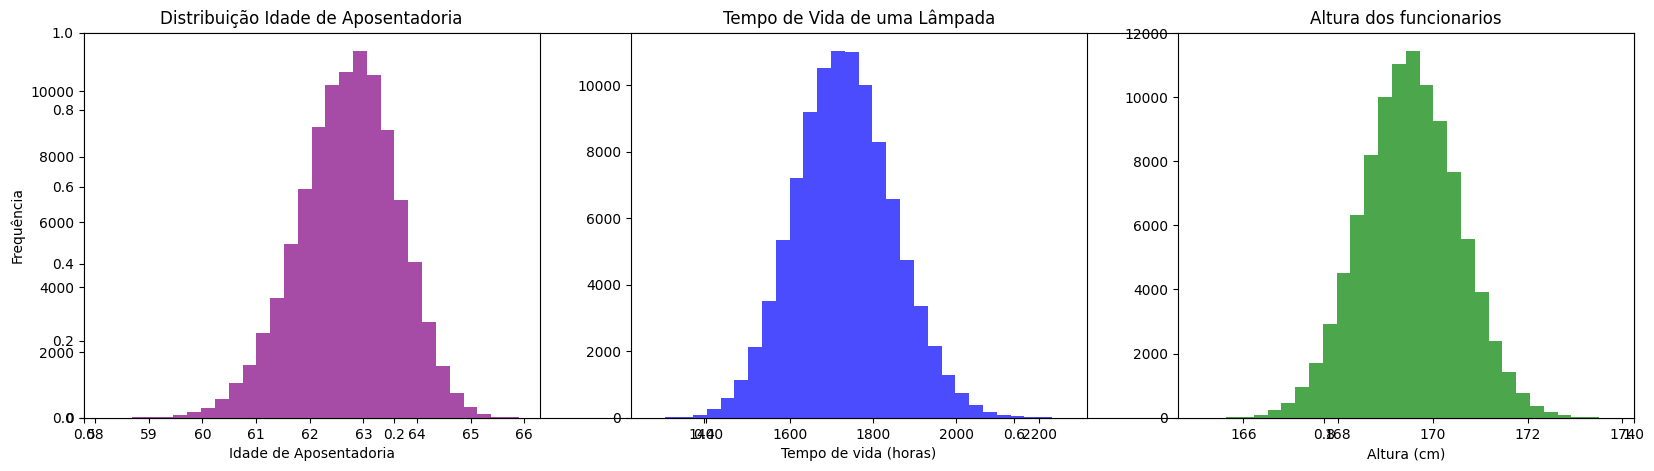

In [11]:
plt.subplots (figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição Idade de Aposentadoria')
plt.xlabel ('Idade de Aposentadoria')
plt.ylabel ('Frequência')
plt.hist (media_aposentadoria, bins=30, alpha=0.7, color='purple')

plt.subplot(132)
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')

plt.subplot (133)
plt.hist (media_altura, bins=30, alpha=0.7, color='green')
plt.title ('Altura dos funcionarios')
plt.xlabel ('Altura (cm)')

plt.show ()

In [12]:
media_nova_amostra = 1200

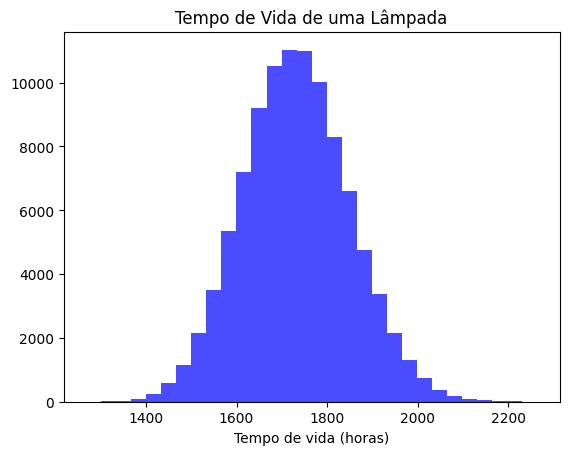

In [13]:
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [14]:
duracao_amostra = pd.DataFrame ({'medias_duracao': media_vida_lampada})

In [15]:
media_das_medias = duracao_amostra['medias_duracao'].mean()
ep = duracao_amostra['medias_duracao'].std()

print ('''  Médias amostrais    ''')

print ('Média', media_das_medias)
print ('erro padrao', ep)

  Médias amostrais    
Média 1731.8053080293507
erro padrao 118.21235040449352


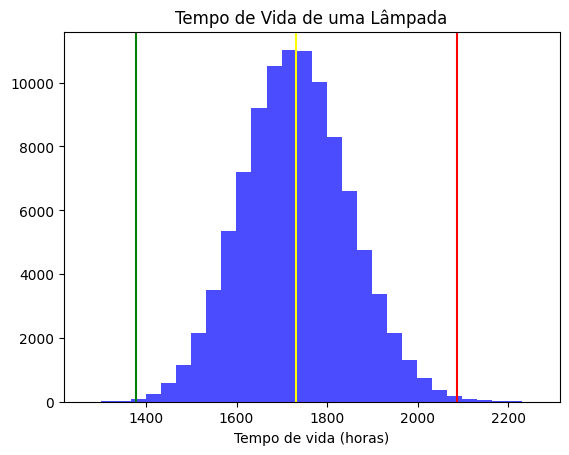

In [16]:
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')
plt.axvline (media_das_medias, color='Yellow')
plt.axvline (media_das_medias + 3*ep, color='Red')
plt.axvline (media_das_medias - 3*ep, color='Green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [17]:
qnt_obs = duracao_amostra[(duracao_amostra > media_das_medias - 3*ep) & (duracao_amostra < media_das_medias + 3*ep)]


In [18]:
qnt_obs.count()/duracao_amostra.count()*100

medias_duracao    99.707
dtype: float64

In [19]:
from scipy import stats

In [20]:
df_vida_lampada

confianca = 0.95

In [21]:
media = df_vida_lampada['duracao'].mean()


AULA 02

In [22]:
h0 = 1570

In [23]:
df_natalinas = pd.read_csv ("data/experimento_lampadas_natalinas.csv")
df_natalinas.head()

,Unnamed: 0,duracao
0,0,1541.121474
1,1,1523.495329
2,2,1521.732707
3,3,1523.280091
4,4,1530.643374


In [24]:
df_natalinas.drop(columns="Unnamed: 0")

,duracao
0,1541.121474
1,1523.495329
2,1521.732707
3,1523.280091
4,1530.643374
...,...
95,1523.112501
96,1528.213843
97,1513.689417
98,1532.400532


In [25]:
media = df_natalinas["duracao"].mean()
print (media.round())

1530.0


In [26]:
confianca = 0.95 #nivel de confianca desejado
desvio_padrao_populacional = 105 #desvio padrao dado pela empresa
tamanho_amostra = len(df_natalinas)

In [27]:
intervalo = stats.norm.interval (confianca, loc= h0, scale= desvio_padrao_populacional/ np.sqrt(tamanho_amostra))

In [28]:
print(intervalo)

(np.float64(1549.4203781623294), np.float64(1590.5796218376706))


In [29]:
# importando o teste Z do statsmodels
from statsmodels.stats.weightstats import ztest

In [30]:
# executando o teste z
statos, p_valor = ztest(x1 = df_natalinas['duracao'], value = 1570, alternative = "two-sided")

In [31]:
print (stats)

<module 'scipy.stats' from 'c:\\Users\\raphael.gaias.TACLA\\AppData\\Local\\Python\\pythoncore-3.14-64\\Lib\\site-packages\\scipy\\stats\\__init__.py'>


In [32]:
if p_valor < 0.05:
    print ("Rejeita h0")
else:
    print ("Aceita h0")

Rejeita h0


In [33]:
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [34]:
m = df_techtaste['avaliacoes'].mean()
h0 = 30
confianca = 0.95
dp = 2.65
tam_amostra = len(df_techtaste)

In [35]:
statos, p_valor = ztest (x1= df_techtaste['avaliacoes'], value=h0, alternative = "two-sided")

In [36]:
intervalo = stats.norm.interval (confianca, loc=h0, scale= dp/ np.sqrt(tam_amostra))
intervalo

(np.float64(29.419303816868016), np.float64(30.580696183131984))

In [37]:
print (m)

40.025


In [38]:
if p_valor < 0.05:
    print ("Rejeita h0")
else:
    print ("Aceita h0")

Rejeita h0


AULA 03

In [40]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]
h0 = 30

In [41]:
media_resposta = np.mean(tempo_resposta)
media_resposta

np.float64(29.96)

In [42]:
from scipy.stats import ttest_1samp

In [43]:
statos, p_valor = ttest_1samp (tempo_resposta, h0, alternative= "less")

print (p_valor)

0.4585970095667924


AULA 04

In [44]:
vendas_com_propaganda = [329.80, 291.70, 338.86, 391.38, 285.95, 285.95, 394.75, 346.05, 271.83, 332.55, 272.19, 272.06, 314.52, 185.20, 196.50, 266.26, 239.23, 318.85, 245.52, 215.26, 387.94, 286.45, 304.05, 214.52, 267.34, 306.66, 230.94, 322.54, 263.96, 282.50, 263.90, 411.14, 299.19, 236.54, 349.35, 226.75, 312.53, 182.42, 220.31, 311.81, 344.31, 310.28, 293.66, 281.93, 211.29, 256.81, 272.36, 363.43, 320.62, 194.22]
vendas_sem_propaganda = [304.44, 261.89, 244.38, 321.70, 346.86, 348.08, 234.65, 266.45, 304.88, 343.53, 256.25, 273.86, 218.62, 213.23, 333.75, 366.37, 280.68, 345.21, 306.70, 246.29, 306.68, 377.28, 282.85, 378.88, 127.82, 334.31, 290.22, 267.06, 290.51, 165.74, 271.82, 306.43, 373.67, 253.90, 236.49, 254.89, 339.92, 304.73, 253.21, 315.80, 292.80, 343.12, 242.88, 265.34, 261.47, 197.19, 302.77, 300.66, 285.31, 270.92]

In [45]:
com_prop = np.mean(vendas_com_propaganda)
sem_prop = np.mean (vendas_sem_propaganda)

print (com_prop, sem_prop)

286.4832 286.2498


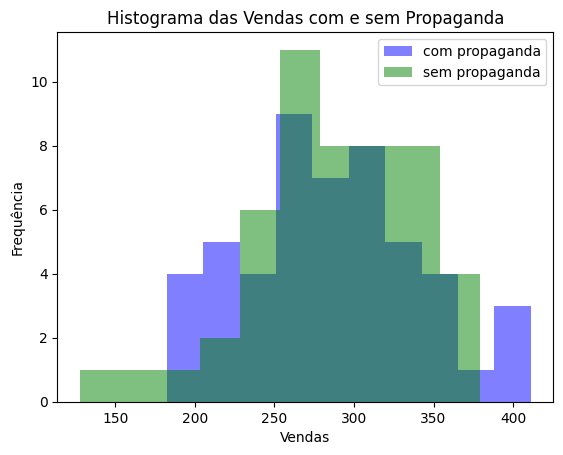

In [46]:
# Criar histogramas
plt.hist(vendas_com_propaganda, color='blue', alpha=0.5, label= 'com propaganda')
plt.hist(vendas_sem_propaganda, color='green', alpha=0.5, label='sem propaganda')

# Adicionar rótulos e título
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

In [49]:
from scipy.stats import ttest_ind

In [50]:
statos, p_valor = ttest_ind (vendas_com_propaganda, vendas_sem_propaganda, alternative='greater')

In [51]:
print (p_valor)

0.49145652153110797
